In [5]:
import pandas
import numpy
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [6]:
mtcars = sm.datasets.get_rdataset('mtcars')
mtcars = mtcars.data

In [7]:
#Hypothesis Testing

from scipy.stats import shapiro
series_2test = mtcars[['hp']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat,p))
if p > 0.05:
    prinit('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.933, p=0.049
Probably not Gaussian


In [8]:
mtcars['log_mpg'] = np.log(mtcars['mpg'])

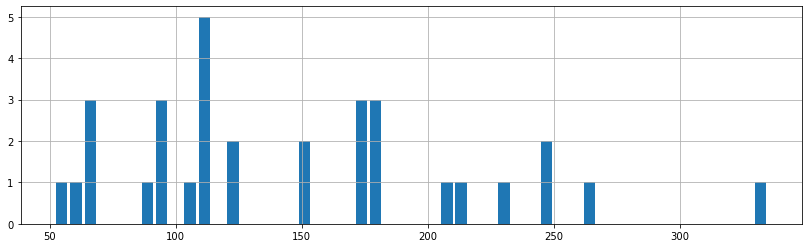

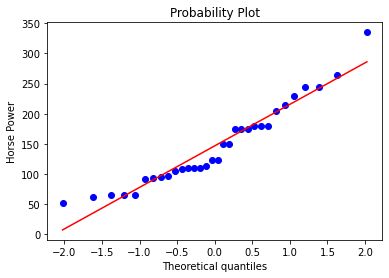

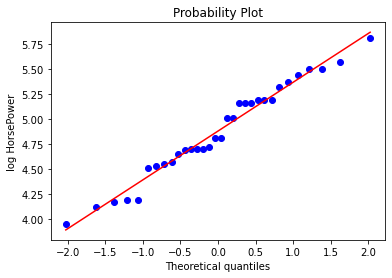

In [38]:
mtcars['hp'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
mtcars['hp'].describe()

stats.probplot(mtcars['hp'], plot=plt)
plt.ylabel('Horse Power')
plt.show()
stats.probplot(np.log(mtcars['hp']), plot=plt)
plt.ylabel('log HorsePower')
plt.show()

#

The average horsepower for all the cars show to be 140 hp, as the majority stays closer to the 50 - 200 hp range. There seems to be a positive correlation with the log hp number. The probability plots show very similar results.

In [21]:
mtcars['mpg'].describe

<bound method NDFrame.describe of Mazda RX4              21.0
Mazda RX4 Wag          21.0
Datsun 710             22.8
Hornet 4 Drive         21.4
Hornet Sportabout      18.7
Valiant                18.1
Duster 360             14.3
Merc 240D              24.4
Merc 230               22.8
Merc 280               19.2
Merc 280C              17.8
Merc 450SE             16.4
Merc 450SL             17.3
Merc 450SLC            15.2
Cadillac Fleetwood     10.4
Lincoln Continental    10.4
Chrysler Imperial      14.7
Fiat 128               32.4
Honda Civic            30.4
Toyota Corolla         33.9
Toyota Corona          21.5
Dodge Challenger       15.5
AMC Javelin            15.2
Camaro Z28             13.3
Pontiac Firebird       19.2
Fiat X1-9              27.3
Porsche 914-2          26.0
Lotus Europa           30.4
Ford Pantera L         15.8
Ferrari Dino           19.7
Maserati Bora          15.0
Volvo 142E             21.4
Name: mpg, dtype: float64>

In [45]:

subsetd = mtcars[['mpg', 'hp', 'log_mpg','cyl','disp','drat','wt','qsec','vs','am','gear','carb']]

In [46]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

target= subsetd['log_mpg']
df_train = subsetd.drop(['log_mpg'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)
# Split data into train and test
mtcars_train = pd.concat([x_train, y_train], axis=1)
#ames_train.head()
mtcars_test = pd.concat([x_test, y_test], axis=1)

In [47]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

mtcars


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,log_mpg
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,3.044522
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,3.044522
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,3.126761
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,3.063391
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,2.928524
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,2.895912
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,2.660260
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,3.194583
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,3.126761
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,2.954910


In [48]:
X = mtcars.drop(['log_mpg'], axis = 1)
X
y = mtcars["log_mpg"]
y
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=0)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(11,)

In [49]:
formula = 'mpg ~ hp'
mtcars_model = ols (formula, data=x_train).fit()
print(mtcars_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 10 Mar 2021   Prob (F-statistic):           3.66e-05
Time:                        18:42:39   Log-Likelihood:                -58.893
No. Observations:                  21   AIC:                             121.8
Df Residuals:                      19   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7882      1.992     15.457      0.0

In [50]:
print('Parameters: ', mtcars_model.params)
print('R2: ', mtcars_model.rsquared)

print('Standard errors: ', mtcars_model.bse)
print('Predicted values: ', mtcars_model.predict())

Parameters:  Intercept    30.788208
hp           -0.068359
dtype: float64
R2:  0.6010008544272065
Standard errors:  Intercept    1.991854
hp           0.012778
dtype: float64
Predicted values:  [23.61047277 26.27648874 24.29406661  7.88781446 26.27648874 14.04015902
 23.26867585 23.33703523 14.04015902 18.82531589 27.23352012 18.82531589
 26.34484813 22.38000386 26.54992628 23.0635977  23.26867585 23.26867585
 20.53430049 16.09094053 18.48351897]


In [52]:
subsetd.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,mpg,hp,log_mpg,cyl,disp,drat,wt,qsec,vs,am,gear,carb
mpg,1.00,-0.78,0.98,-0.85,-0.85,0.68,-0.87,0.42,0.66,0.60,0.48,-0.55
hp,-0.78,1.00,-0.79,0.83,0.79,-0.45,0.66,-0.71,-0.72,-0.24,-0.13,0.75
log_mpg,0.98,-0.79,1.00,-0.85,-0.88,0.67,-0.89,0.42,0.67,0.58,0.49,-0.55
cyl,-0.85,0.83,-0.85,1.00,0.90,-0.70,0.78,-0.59,-0.81,-0.52,-0.49,0.53
disp,-0.85,0.79,-0.88,0.90,1.00,-0.71,0.89,-0.43,-0.71,-0.59,-0.56,0.39
drat,0.68,-0.45,0.67,-0.70,-0.71,1.00,-0.71,0.09,0.44,0.71,0.70,-0.09
wt,-0.87,0.66,-0.89,0.78,0.89,-0.71,1.00,-0.17,-0.55,-0.69,-0.58,0.43
qsec,0.42,-0.71,0.42,-0.59,-0.43,0.09,-0.17,1.00,0.74,-0.23,-0.21,-0.66
vs,0.66,-0.72,0.67,-0.81,-0.71,0.44,-0.55,0.74,1.00,0.17,0.21,-0.57
am,0.60,-0.24,0.58,-0.52,-0.59,0.71,-0.69,-0.23,0.17,1.00,0.79,0.06
